<a href="https://colab.research.google.com/github/RvXp/Topicos-Especiais-em-IA-LLM/blob/main/aula0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [2]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = (iris.target == 1).astype(float)
X = torch.tensor(X, dtype=torch.float32)
#print(X.shape)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
#print(y.shape)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
modelo = torch.nn.Linear(4, 1)
funcao_perda = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.1)

In [5]:
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = modelo(X_train)
    loss = funcao_perda(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/100], Loss: {loss.item():.4f}")

Época [10/100], Loss: 0.6425
Época [20/100], Loss: 0.6227
Época [30/100], Loss: 0.6127
Época [40/100], Loss: 0.6066
Época [50/100], Loss: 0.6022
Época [60/100], Loss: 0.5987
Época [70/100], Loss: 0.5956
Época [80/100], Loss: 0.5927
Época [90/100], Loss: 0.5900
Época [100/100], Loss: 0.5875
Época [110/100], Loss: 0.5851
Época [120/100], Loss: 0.5827
Época [130/100], Loss: 0.5805
Época [140/100], Loss: 0.5783
Época [150/100], Loss: 0.5762
Época [160/100], Loss: 0.5742
Época [170/100], Loss: 0.5723
Época [180/100], Loss: 0.5704
Época [190/100], Loss: 0.5686
Época [200/100], Loss: 0.5669
Época [210/100], Loss: 0.5652
Época [220/100], Loss: 0.5636
Época [230/100], Loss: 0.5621
Época [240/100], Loss: 0.5606
Época [250/100], Loss: 0.5591
Época [260/100], Loss: 0.5577
Época [270/100], Loss: 0.5564
Época [280/100], Loss: 0.5551
Época [290/100], Loss: 0.5538
Época [300/100], Loss: 0.5526
Época [310/100], Loss: 0.5514
Época [320/100], Loss: 0.5503
Época [330/100], Loss: 0.5492
Época [340/100], Lo

In [6]:
with torch.no_grad():
    y_logits = modelo(X_test)
y_pred_probs = torch.sigmoid(y_logits)
y_test_np = y_test.numpy()
y_pred_probs_np = y_pred_probs.numpy()

Matriz de Confusão:
[[19  2]
 [ 5  4]]


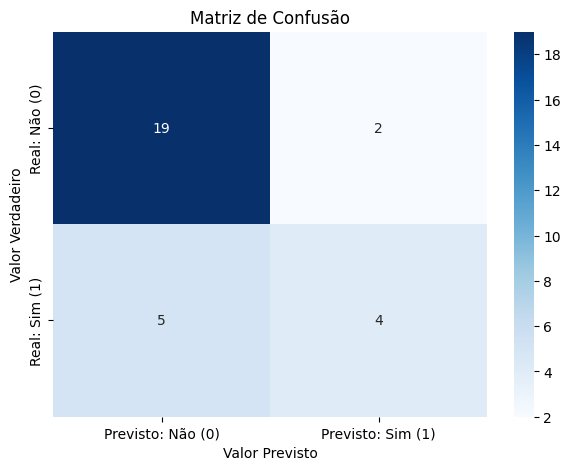

In [7]:
threshold = 0.5
y_pred_classes = (y_pred_probs_np >= threshold).astype(int)
cm = confusion_matrix(y_test_np, y_pred_classes)
print("Matriz de Confusão:")
print(cm)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Não (0)', 'Previsto: Sim (1)'],
            yticklabels=['Real: Não (0)', 'Real: Sim (1)'])
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

0.8201058201058201


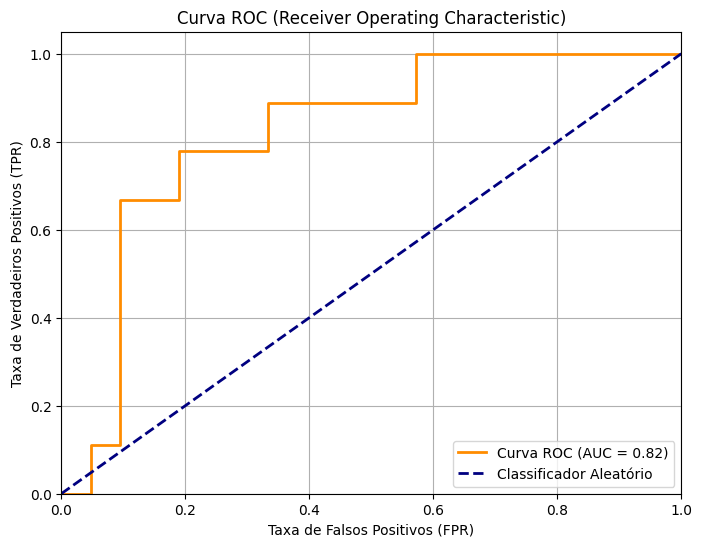

In [8]:
auc_score = roc_auc_score(y_test_np, y_pred_probs_np)
print(auc_score)
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_probs_np)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [9]:
acc_sklearn = accuracy_score(y_test_np, y_pred_classes)
print(acc_sklearn)

prec_sklearn = precision_score(y_test_np, y_pred_classes)
print(prec_sklearn)

0.7666666666666667
0.6666666666666666
